In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.multiclass import OneVsOneClassifier

In [2]:
df     = pd.read_csv("data/lyrical_genius.csv")

# df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]
df = df[((df["Genre"] != "pop") & (df["Genre"] != "classical"))]
df = df.drop(columns="Unnamed: 0")
df = df.drop(columns="Unnamed: 0.1")
df = df.drop_duplicates(subset=["Name","Artist"],keep=False)

genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
colors_list = [colors[genre] for genre in genres]
df.head()

,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Lyrics
0,rnb,3ibKnFDaa3GhpPGlOUj7ff,80,False,Let Me Love You,Mario,0.656,0.578,7,-8.970,0,0.0922,0.2350,0.0,0.1180,0.556,94.514,4,"Mmmm Mmmmm Yeah Mmmmm Yeah, yeah, yeah Mmmm Y..."
1,rnb,2aIdVb8v9KTpEZnftkz2mD,78,False,Buy U a Drank (Shawty Snappin'),T-Pain,0.451,0.550,1,-8.137,1,0.2620,0.0108,0.0,0.0737,0.594,80.001,4,None
2,rnb,7DFnq8FYhHMCylykf6ZCxA,69,False,Yo (Excuse Me Miss),Chris Brown,0.536,0.612,4,-5.847,1,0.2720,0.1190,0.0,0.2090,0.570,86.768,4,Let’s get ONE. THING. STRAIGHT! Certain shit ...
3,rnb,39YovPslPCXbFYhlYjsZ2Y,67,False,Don't Mess With My Man,Nivea,0.879,0.730,11,-4.369,0,0.1640,0.1140,0.0,0.2410,0.885,99.925,4,"] Uh, I like it baby, uh Uh, one time for the..."
4,rnb,3LmvfNUQtglbTrydsdIqFU,72,False,We Belong Together,Mariah Carey,0.838,0.469,0,-7.992,1,0.0835,0.0358,0.0,0.0928,0.778,139.975,4,"Ooh, oh oh Sweet love, yeah I didn't mean i..."


In [3]:
df["Genre"].value_counts()

country      898
edm_dance    845
hiphop       406
rock         377
rnb          326
Name: Genre, dtype: int64

In [4]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [5]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

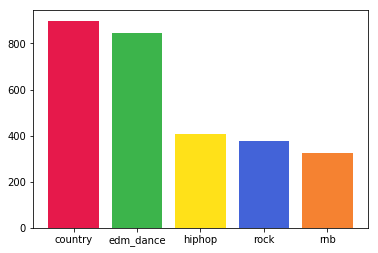

In [6]:
hist_data = dict(y.value_counts())
keys = list(hist_data.keys())
vals = list(hist_data.values())
plt.bar(keys,vals ,color=colors_list)
plt.show()

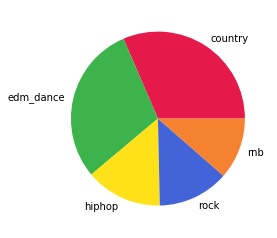

In [7]:
plt.pie(vals,labels=keys ,colors=colors_list)
plt.show()

In [8]:
df.groupby(["Genre"]).describe()

Popularity                                                      \
               count       mean        std   min   25%   50%   75%   max   
Genre                                                                      
country        898.0  47.874165  13.773724   5.0  37.0  48.0  57.0  81.0   
edm_dance      845.0  47.041420  12.303120   0.0  38.0  46.0  56.0  85.0   
hiphop         406.0  55.679803  15.479207  19.0  45.0  56.5  67.0  92.0   
rnb            326.0  59.291411  10.812716  33.0  51.0  59.0  67.0  85.0   
rock           377.0  56.957560  14.288937   0.0  48.0  57.0  67.0  84.0   

          Danceability            ...      Tempo          Time_Signature  \
                 count      mean  ...        75%      max          count   
Genre                             ...                                      
country          898.0  0.600300  ...  139.94600  208.426          898.0   
edm_dance        845.0  0.636692  ...  128.01400  191.814          845.0   
hiphop           406.0  0.754983  ...  135.75525  216.115          406.0   
rnb              326.0  0.682340  ...  130.34475  203.862          326.0   
rock             377.0  0.489560  ...  150.01600  204.214          377.0   

                                                        
               mean       std  min  25%  50%  75%  max  
Genre                                                   
country    3.934298  0.273553  1.0  4.0  4.0  4.0  5.0  
edm_dance  3.970414  0.239124  1.0  4.0  4.0  4.0  5.0  
hiphop     4.000000  0.314270  1.0  4.0  4.0  4.0  5.0  
rnb        4.000000  0.248069  1.0  4.0  4.0  4.0  5.0  
rock       3.933687  0.279352  1.0  4.0  4.0  4.0  4.0  

[5 rows x 104 columns]

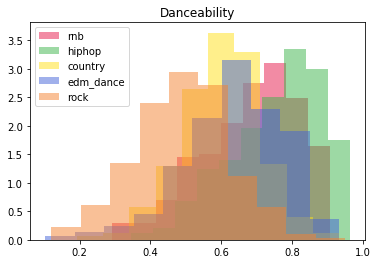

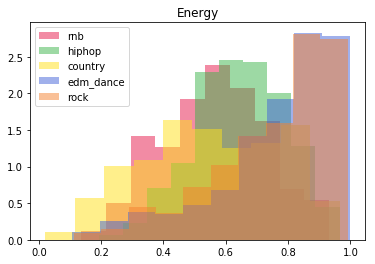

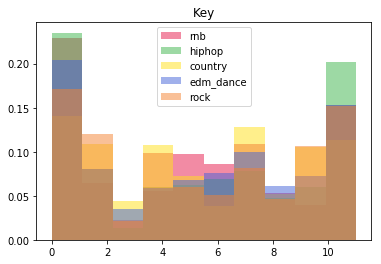

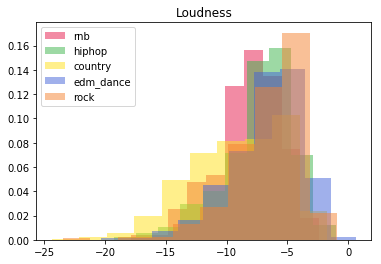

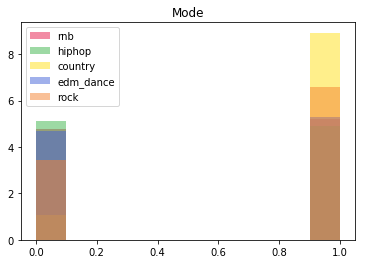

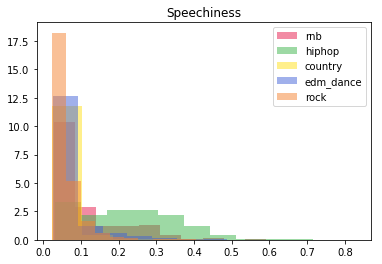

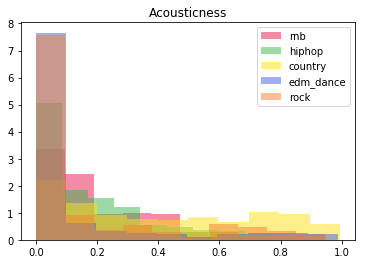

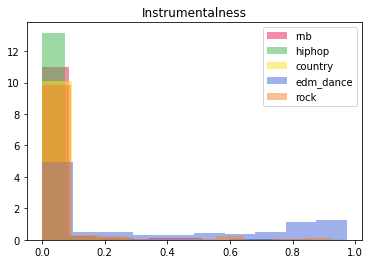

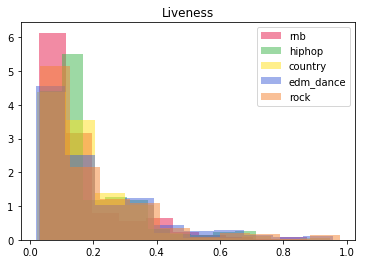

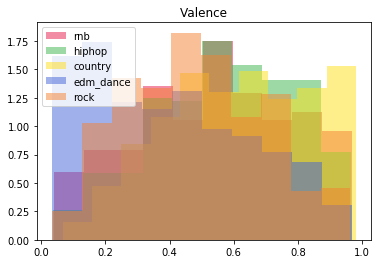

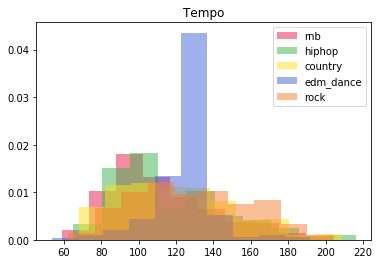

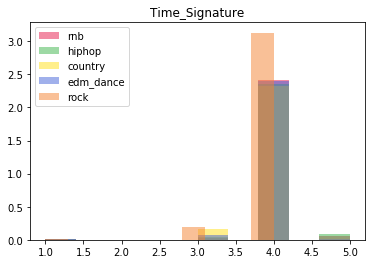

In [9]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for genre in genres:
            plt.hist(content[df["Genre"] == genre],label=genre,color=colors[genre],density=1,alpha=.5)
            plt.title(label)
        plt.legend()
        plt.show()

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

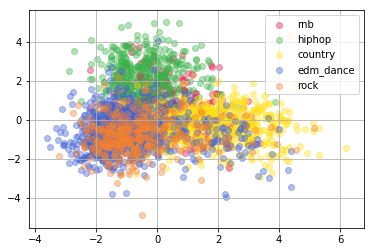

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)


for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    xs   = prin_df["PC1"][mask]
    ys   = prin_df["PC2"][mask]
    ax.scatter(xs,ys, c=color,alpha=.4)

ax.legend(genres)
ax.grid()

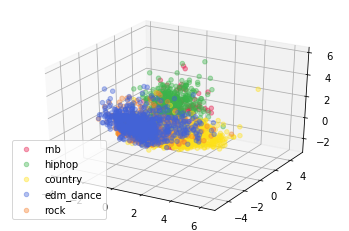

In [12]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color,alpha=.4)

    
ax.legend(genres)
ax.grid()

In [13]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2, random_state=1234, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(solver="lbfgs", multi_class="ovo")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
training = clf.score(X_train, y_train)
testing  = clf.score(X_test,  y_test)
print("Training Accuracy: {}".format(training))
print("Testing  Accuracy: {}".format(testing))
print(genres)
print(confusion_matrix(y_test,y_pred,labels=genres))
print(classification_report(y_test, y_pred)) 

ValueError: multi_class should be 'multinomial', 'ovr' or 'auto'. Got ovo.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
ns = []
test_scores = []
train_scores = []
for n in range(1,40,2):
    classifier = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=n))  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    training = classifier.score(X_train, y_train)
    testing  = classifier.score(X_test,  y_test)
    
    ns.append(n)
    test_scores.append(testing)
    train_scores.append(training)
plt.plot(ns,test_scores,label="Testing")
plt.plot(ns, train_scores,label="Training")
plt.legend()
plt.show()

In [37]:
clf = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=11))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
training = clf.score(X_train, y_train)
testing  = clf.score(X_test,  y_test)
print("Training Accuracy: {}".format(training))
print("Testing  Accuracy: {}".format(testing))
print(confusion_matrix(y_test,y_pred,labels=genres))
print(classification_report(y_test, y_pred)) 

Training Accuracy: 0.7246821569487067
Testing  Accuracy: 0.7110332749562172
[[ 16  21  18   8   2]
 [  9  59   8   4   1]
 [  6   2 158  10   4]
 [  4   6   6 146   7]
 [  2   2  31  14  27]]
              precision    recall  f1-score   support

     country       0.71      0.88      0.79       180
   edm_dance       0.80      0.86      0.83       169
      hiphop       0.66      0.73      0.69        81
         rnb       0.43      0.25      0.31        65
        rock       0.66      0.36      0.46        76

   micro avg       0.71      0.71      0.71       571
   macro avg       0.65      0.61      0.62       571
weighted avg       0.69      0.71      0.69       571



The best k for KNN seems to be when $k=11$ as both the training and testing accuracies reach a monotonic state here.

In [19]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import tree

In [29]:
def cv_performance(clf, X, y, kf, metrics=["accuracy"]) :
    """
    Splits the data, X and y, into k-folds and runs k-fold cross-validation.
    Trains classifier on k-1 folds and tests on the remaining fold.
    Calculates the k-fold cross-validation accuracy for classifier
    by averaging the performance across folds.
    
    Adapted for HW6
    """
    y=np.array(y.tolist())
    k = kf.get_n_splits(X, y)
    m = len(metrics)
    scores = np.empty((m, k))
    m=0
    for k, (train, test) in enumerate(kf.split(X, y)) :
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        clf.fit(X_train, y_train)
        # use Decision_tree_classifier.predict to make predictions
        y_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        scores[m,k] = score
            
    return scores.mean(axis=1) # average across columns

In [30]:
def select_params(X, y, kf, metrics=["accuracy"]) :
    """
    Sweeps different settings for the hyperparameters of a Decision Tree classifier,
    calculating the k-fold CV performance for each setting and metric,
    then selects the hyperparameters that maximize the average performance for each metric.
    
    Adapted from HW6
    """

    # part 4b: for each metric, select optimal hyperparameters using cross-validation
    
    # create grid of hyperparameters
    # hint: use a small 2x2 grid of hyperparameters for debugging
    depth_range = range(5,21)
    min_samples_range = range(1,15)
    scores = np.empty((len(metrics), len(depth_range), len(min_samples_range)))

    # compute CV scores using cv_performance(...)
    for depth_ind, max_depth in enumerate(depth_range):
        for samples_ind, min_samples in enumerate(min_samples_range):
            clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples) 
            # compute CV scores using cv_performance(...)
            score = cv_performance(clf, X, y, kf, metrics)
            scores[:,depth_ind,samples_ind] = score
    
    # get best hyperparameters
    best_params = []
    for met_ind, metric in enumerate(scores):
        print (metrics[met_ind])
        print ("maximum score is", metric.max())
        depth_ind, samples_ind = np.unravel_index(metric.argmax(), metric.shape)
        params = (depth_range[depth_ind], min_samples_range[samples_ind])
        print( "max_depth, min_samples=", params)
        best_params.append(params)
    
    return best_params

In [31]:
# optimize parameters with cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
opt_max_depth, opt_min_samples = select_params(X_train, y_train, skf)[0]

accuracy
maximum score is 0.6734008097165992
max_depth, min_samples= (10, 8)


In [32]:
# train classifier
DTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=opt_max_depth, min_samples_leaf=opt_min_samples)
DTree.fit(X_train,y_train)

# predict genres of test data
accuracy = DTree.score(X_test,y_test)

print("Test accuracy of the DTree is")
print(accuracy)
print("=============================")

Test accuracy of the DTree is
0.6882661996497373


In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
# compare to stratified dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
dummy_accuracy = dummy.score(X_test,y_test)
print( "Dummy classifier accuracy is" )
print(dummy_accuracy)

Dummy classifier accuracy is
0.2504378283712785
